# **This File is divided into:**

**1) Introduction to Class Imbalance**

**2) Why Balancing is Important**

**3) Evaluation Metrics for Imbalanced Data**

**4) Data-Level Techniques (with advantages, disadvantages, and use cases):**

--Random Undersampling

--Random Oversampling

--SMOTE

--SMOTE + ENN (SMOTEENN)

**5) Algorithm-Level Techniques:**

--Class Weighting



# 1. Introduction to Class Imbalance

In real-world machine learning problems, we often encounter datasets where one class is significantly more frequent than the other(s). This situation is called class imbalance.

**Example:**

Fraud Detection: 98% transactions are normal, 2% are fraud.

Disease Diagnosis: 95% are healthy, 5% are affected.


# 2. Why is Class Imbalance a Problem?

Most machine learning algorithms assume equal class distribution. With imbalance:

The model biases towards the majority class.

It may give high accuracy but poor recall/precision for the minority class.

Important real-world cases (e.g., fraud, disease) may be missed.

# 3. Evaluation Metrics for Imbalanced Data

Instead of accuracy, we use:

**Precision:** Out of predicted positives, how many are correct.

**Recall (Sensitivity):** Out of actual positives, how many are correctly predicted.

**F1-Score:** Harmonic mean of precision and recall.

**Confusion Matrix:** Helps visualize true positives, false positives, etc.

**ROC-AUC:** Evaluates classifier performance across thresholds.


# 4. Data-Level Techniques

**a. Random Undersampling**

What it is: Reduces the size of the majority class by randomly removing examples.

Use case: When dataset is large, and we want quicker training.

**Advantages:**

Reduces training time

Simple and easy to implement

**Disadvantages:**

May lose important data from majority class

Can underperform if majority class is reduced too much

**b. Random Oversampling**

What it is: Duplicates examples from the minority class to balance the data.

Use case: When we have fewer data points and want to avoid losing data.

**Advantages:**

No loss of original data

Easy to apply

**Disadvantages:**

Can lead to overfitting due to repeated data

No new information is added

**c. SMOTE (Synthetic Minority Oversampling Technique)**

What it is: Creates synthetic data points for the minority class by interpolating between real examples.

Use case: Better for creating more informative samples rather than copying.

**Advantages:**

Reduces overfitting seen in random oversampling

Adds new data, not just copies

**Disadvantages:**

May create overlapping classes

Assumes feature space is continuous, not ideal for categorical variables

**d. SMOTE + ENN (SMOTEENN)**

What it is: First uses SMOTE to oversample, then ENN (Edited Nearest Neighbors) to remove ambiguous or noisy samples.

Use case: When we want synthetic data + clean data.

**Advantages:**

Balances data + improves quality

Handles borderline/noisy examples better

**Disadvantages:**

More complex and computationally expensive

May remove some useful borderline cases

# 5. Algorithm-Level Techniques

**a. Class Weighting**

What it is: Assigns higher penalty to misclassifying the minority class.

Use case: When you don’t want to change the data distribution but want to inform the algorithm to "pay more attention" to the minority class.

**Advantages:**

No data is removed or added

Many models support it (Logistic Regression, Random Forest, etc.)

**Disadvantages:**

Needs tuning of weights

May not work well for extremely imbalanced datasets



In [19]:
# Create a imbalance data
from sklearn.datasets import make_classification
X, Y = make_classification(n_samples=5000 , n_features=10 , weights=[0.95 , 0.05] , random_state=42)
'''
weights=[0.95 , 0.05]  This means in our target variable column
95% No
5%  Yes
'''

'\nweights=[0.95 , 0.05]  This means in our target variable column\n95% No\n5%  Yes\n'

In [20]:
import pandas as pd
import numpy as np
new_df=pd.DataFrame(X)  # Independent variable
new_df

,0,1,2,3,4,5,6,7,8,9
0,1.864200,-2.371159,-0.671308,-0.666403,1.313473,0.089198,-2.025296,-0.673544,-0.696461,-0.076865
1,0.335487,0.271304,-2.020151,-0.026345,1.237954,-0.821913,-0.135680,0.317409,0.385470,0.133730
2,0.146633,-1.544279,0.592521,-0.533506,2.098841,0.630108,-1.675337,-0.205581,-1.030095,-0.658175
3,1.381038,1.705665,0.592245,-0.422983,-0.236920,-0.183078,-1.774660,2.598429,-0.485876,-2.627336
4,1.909303,0.752866,0.215403,-0.141142,0.365654,-0.289065,-0.620162,1.040194,-1.217340,0.650181
...,...,...,...,...,...,...,...,...,...,...
4995,-1.869980,-0.456454,0.690073,0.172400,-0.291520,-0.709841,0.686945,-0.834066,-0.350569,1.752429
4996,1.485217,-0.521684,1.117632,-0.096900,-0.772509,0.501852,-0.267543,-0.264658,0.739759,-0.342994
4997,-1.067255,0.356959,0.408854,-0.072746,1.358744,0.539942,-0.314902,0.506838,-1.311666,-2.015771
4998,1.212491,-2.101953,-0.818134,-0.716675,-0.488136,-2.033299,-2.246343,-0.302059,0.395469,-1.164547


In [21]:
import pandas as pd
import numpy as np
new_df=pd.DataFrame(Y)  # dependent variable
new_df

,0
0,0
1,0
2,1
3,0
4,0
...,...
4995,0
4996,0
4997,0
4998,0


In [22]:
# Lets count how many 1 and how many 0 we have in our target column ( y )
from collections import Counter
'''
Out of 5000 values
4722 - No (95%)
278 - Yes (5%)

So It is a IMBALANCED DATA
'''
Counter(Y)

Counter({np.int64(0): 4722, np.int64(1): 278})

# Original Model Without Balancing

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
x_train , x_test , y_train , y_test = train_test_split( X , Y , test_size=0.2 , random_state=0)
model=LogisticRegression()
model.fit(x_train , y_train)
y_pred = model.predict(x_test)
print(classification_report(y_test ,y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       952
           1       0.87      0.27      0.41        48

    accuracy                           0.96      1000
   macro avg       0.92      0.63      0.70      1000
weighted avg       0.96      0.96      0.95      1000



# Random Oversampling

In [24]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()

x_ros , y_ros = ros.fit_resample(x_train , y_train)
print("Count of values is :", Counter(y_ros))

model.fit(x_ros , y_ros)
y_pred = model.predict(x_test)
print(classification_report(y_test , y_pred))

Count of values is : Counter({np.int64(0): 3770, np.int64(1): 3770})
              precision    recall  f1-score   support

           0       0.99      0.83      0.90       952
           1       0.21      0.90      0.34        48

    accuracy                           0.83      1000
   macro avg       0.60      0.86      0.62      1000
weighted avg       0.96      0.83      0.88      1000



# Random Undersampling

In [25]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()

x_rus , y_rus = rus.fit_resample(x_train , y_train)
print("Count of values is :", Counter(y_rus))

model.fit(x_rus , y_rus)
y_pred = model.predict(x_test)
print(classification_report(y_test , y_pred))

Count of values is : Counter({np.int64(0): 230, np.int64(1): 230})
              precision    recall  f1-score   support

           0       0.99      0.83      0.91       952
           1       0.21      0.90      0.34        48

    accuracy                           0.84      1000
   macro avg       0.60      0.86      0.63      1000
weighted avg       0.96      0.84      0.88      1000



# SMOTE

In [26]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

x_ros , y_smote = smote.fit_resample(x_train , y_train)
print("Count of values is :", Counter(y_ros))

model.fit(x_ros , y_smote)
y_pred = model.predict(x_test)
print(classification_report(y_test , y_pred))

Count of values is : Counter({np.int64(0): 3770, np.int64(1): 3770})
              precision    recall  f1-score   support

           0       0.99      0.83      0.91       952
           1       0.21      0.90      0.35        48

    accuracy                           0.84      1000
   macro avg       0.60      0.86      0.63      1000
weighted avg       0.96      0.84      0.88      1000



# SMOTEENN

In [27]:
from imblearn.combine import SMOTEENN
smoteenn = SMOTEENN()

x_ros , y_ros = smoteenn.fit_resample(x_train , y_train)
print("Count of values is :", Counter(y_ros))

model.fit(x_ros , y_ros)
y_pred = model.predict(x_test)
print(classification_report(y_test , y_pred))


Count of values is : Counter({np.int64(1): 3738, np.int64(0): 3100})
              precision    recall  f1-score   support

           0       0.99      0.80      0.88       952
           1       0.18      0.92      0.31        48

    accuracy                           0.80      1000
   macro avg       0.59      0.86      0.60      1000
weighted avg       0.96      0.80      0.86      1000



# Class Weightin

In [28]:
model1= LogisticRegression(class_weight="balanced")
model1.fit(x_train , y_train)
y_pred = model1.predict(x_test)
print("Count of values is :", Counter(y_train))
print(classification_report(y_test , y_pred))

Count of values is : Counter({np.int64(0): 3770, np.int64(1): 230})
              precision    recall  f1-score   support

           0       0.99      0.83      0.91       952
           1       0.21      0.90      0.34        48

    accuracy                           0.83      1000
   macro avg       0.60      0.86      0.62      1000
weighted avg       0.96      0.83      0.88      1000



# Visualizing Class Distribution

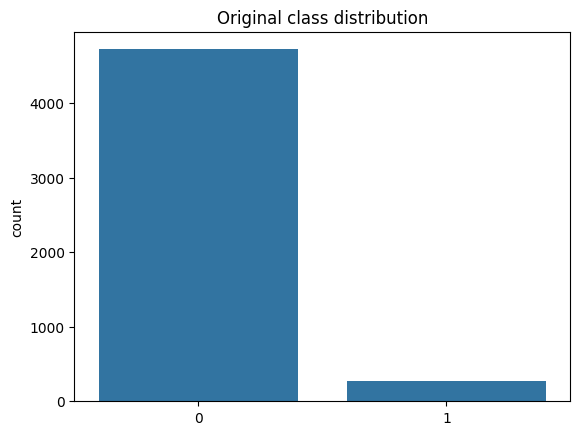

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x=Y)  # on x axis visualize your target variable
plt.title("Original class distribution")
plt.show()

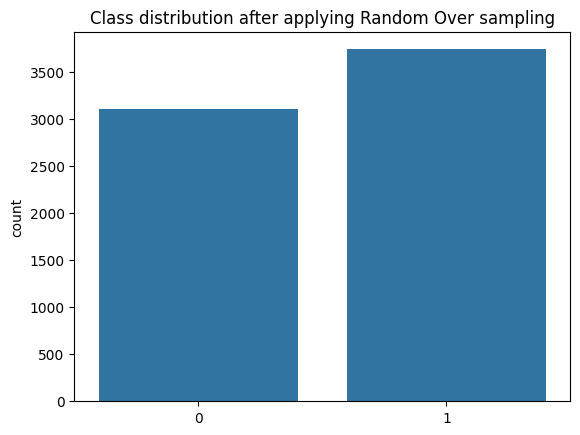

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x= y_ros)  # on x axis visualize your target variable
plt.title("Class distribution after applying Random Over sampling")
plt.show()

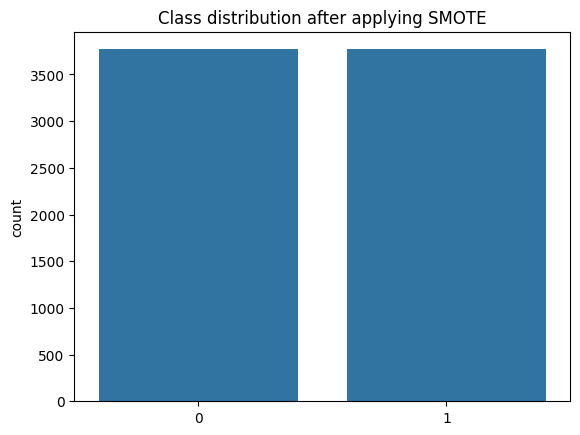

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x= y_smote)  # on x axis visualize your target variable
plt.title("Class distribution after applying SMOTE")
plt.show()

In [32]:
'''
sun - GMM
sat - SVD mathrmatics
sun - Recommendation system
sat- OLS + Markovchain
sun - Gradient descent , SGD
sat - Tuning of models + Data imputation
sun - Predictive modeling ( Forecasting modes )

'''

'\nsun - GMM\nsat - SVD mathrmatics\nsun - Recommendation system\nsat- OLS + Markovchain\nsun - Gradient descent , SGD\nsat - Tuning of models + Data imputation\nsun - Predictive modeling ( Forecasting modes )\n\n'